In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Input
from keras.layers import CuDNNLSTM,LSTM
from keras.models import Model
from keras.utils.np_utils import to_categorical
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

###Preprocessing the dataset with various attacks

In [164]:
def preprocessing_final(df):
  lamda = 1e-4
  df.drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','Flow ID',' Source IP',' Source Port',' Destination IP',' Destination Port',' Timestamp','SimillarHTTP',' Inbound',' Fwd Header Length.1'],axis=1,inplace=True)
  df.replace(-np.inf, np.nan,inplace=True)
  df.replace(np.inf, np.nan,inplace=True)
  df.dropna(axis=0,inplace=True)
  # cols = [' Label']
  # for col in df.columns:
  #   if len(np.unique(df.loc[:,col])) < 5:
  #     cols.append(col)
  # for col in df.columns:
  #   if col not in cols:
  #     df.loc[:,col] = (df.loc[:,col]-df.loc[:,col].min())/(df.loc[:,col].max()-df.loc[:,col].min())
  labels = np.unique(df.iloc[:,-1])
  for i in range(len(labels)):
    df.iloc[:,-1] = df.iloc[:,-1].replace(labels[i],i)
  df = df[[' Protocol',' Flow Duration','Flow Bytes/s',' Flow Packets/s','Fwd Packets/s',' Bwd Packets/s',' Total Fwd Packets',' Total Backward Packets',
  'Total Length of Fwd Packets',' Total Length of Bwd Packets', ' Fwd Packet Length Max',' Fwd Packet Length Min',' Fwd Packet Length Mean',' Fwd Packet Length Std',
   'Bwd Packet Length Max',' Bwd Packet Length Min',' Bwd Packet Length Mean',' Bwd Packet Length Std',
 ' Max Packet Length',' Min Packet Length',' Packet Length Mean',' Packet Length Std',' Packet Length Variance',' Fwd Header Length',' Bwd Header Length',
 ' min_seg_size_forward',' act_data_pkt_fwd',' Flow IAT Mean',' Flow IAT Max',' Flow IAT Min',' Flow IAT Std','Fwd IAT Total',' Fwd IAT Max',
 ' Fwd IAT Min',' Fwd IAT Mean',' Fwd IAT Std','Bwd IAT Total', ' Bwd IAT Max',' Bwd IAT Min',' Bwd IAT Mean',' Bwd IAT Std','Fwd PSH Flags',
 ' Bwd PSH Flags',' Fwd URG Flags', ' Bwd URG Flags','FIN Flag Count',' SYN Flag Count', ' RST Flag Count', ' PSH Flag Count',
 ' ACK Flag Count', ' URG Flag Count',' ECE Flag Count',' Down/Up Ratio',' Average Packet Size','Init_Win_bytes_forward', ' Init_Win_bytes_backward',
 ' Active Max', ' Active Min','Active Mean',' Active Std',' Idle Max', ' Idle Min','Idle Mean', ' Idle Std','Fwd Avg Bytes/Bulk',
 ' Fwd Avg Packets/Bulk',' Bwd Avg Bytes/Bulk',' Bwd Avg Packets/Bulk',' Fwd Avg Bulk Rate','Bwd Avg Bulk Rate',' Avg Fwd Segment Size', ' Avg Bwd Segment Size',
 ' CWE Flag Count','Subflow Fwd Packets',' Subflow Bwd Packets',' Subflow Fwd Bytes',' Subflow Bwd Bytes',' Label'
]]
  return df

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import dask.dataframe as dd

###Loading the dataset with various attacks

In [5]:
df = pd.read_csv("/content/drive/MyDrive/Deep_Learning/DDoS_data/Data/final_dataset.csv",low_memory=False)

In [ ]:
df = pd.read_csv("final_dataset.csv", low_memory=False)

In [ ]:
df.shape

(1245798, 90)

###Splitting the data using random stratified sampling

In [165]:
train_df,valid_df = train_test_split(df,test_size=0.3,shuffle=True,stratify=df.iloc[:,-1])

In [ ]:
test_df = pd.read_csv("/content/flows.csv")

In [ ]:
[' Protocol',' Flow Duration','Flow Bytes/s',' Flow Packets/s','Fwd Packets/s',' Bwd Packets/s',' Total Fwd Packets',' Total Backward Packets',
  'Total Length of Fwd Packets',' Total Length of Bwd Packets', ' Fwd Packet Length Max',' Fwd Packet Length Min',' Fwd Packet Length Mean',' Fwd Packet Length Std',
   'Bwd Packet Length Max',' Bwd Packet Length Min',' Bwd Packet Length Mean',' Bwd Packet Length Std',
 ' Max Packet Length',' Min Packet Length',' Packet Length Mean',' Packet Length Std',' Packet Length Variance',' Fwd Header Length',' Bwd Header Length',
 ' min_seg_size_forward',' act_data_pkt_fwd',' Flow IAT Mean',' Flow IAT Max',' Flow IAT Min',' Flow IAT Std','Fwd IAT Total',' Fwd IAT Max',
 ' Fwd IAT Min',' Fwd IAT Mean',' Fwd IAT Std','Bwd IAT Total', ' Bwd IAT Max',' Bwd IAT Min',' Bwd IAT Mean',' Bwd IAT Std','Fwd PSH Flags',
 ' Bwd PSH Flags',' Fwd URG Flags', ' Bwd URG Flags','FIN Flag Count',' SYN Flag Count', ' RST Flag Count', ' PSH Flag Count',
 ' ACK Flag Count', ' URG Flag Count',' ECE Flag Count',' Down/Up Ratio',' Average Packet Size','Init_Win_bytes_forward', ' Init_Win_bytes_backward',
 ' Active Max', ' Active Min','Active Mean',' Active Std',' Idle Max', ' Idle Min','Idle Mean', ' Idle Std','Fwd Avg Bytes/Bulk',
 ' Fwd Avg Packets/Bulk',' Bwd Avg Bytes/Bulk',' Bwd Avg Packets/Bulk',' Fwd Avg Bulk Rate','Bwd Avg Bulk Rate',' Avg Fwd Segment Size', ' Avg Bwd Segment Size',
 ' CWE Flag Count','Subflow Fwd Packets',' Subflow Bwd Packets',' Subflow Fwd Bytes',' Subflow Bwd Bytes',' Label'
]

In [ ]:
test_df.drop(['src_ip','dst_ip','src_port','dst_port','timestamp'],axis=1,inplace=True)

In [ ]:
np.unique(train_df.iloc[:,-1])

array(['BENIGN', 'LDAP', 'MSSQL', 'NetBIOS', 'Portmap', 'Syn', 'UDP',
       'UDPLag'], dtype=object)

###Preprocessing the data



In [166]:
train_df = preprocessing_final(train_df)
valid_df = preprocessing_final(valid_df)

In [167]:
BATCH_SIZE = 100
NUM_OF_CLASSES = len(np.unique(df.iloc[:,-1]))
EPOCHS = 10

In [168]:
x_train,y_train = train_df.iloc[:,:-1],train_df.iloc[:,-1]
x_valid,y_valid = valid_df.iloc[:,:-1],valid_df.iloc[:,-1]

In [169]:
x_train = x_train.to_numpy()
x_valid = x_valid.to_numpy()
y_train = y_train.to_numpy()
y_valid = y_valid.to_numpy()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


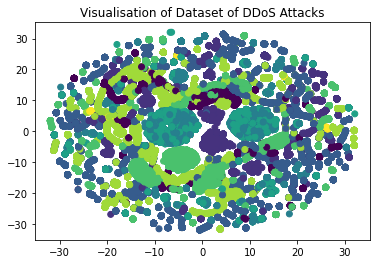

In [ ]:
from sklearn.manifold import TSNE

x_embedded = TSNE(n_components=2, learning_rate=30, perplexity=20).fit_transform(x_train[:50000])

plt.scatter(x_embedded[:, 0], x_embedded[:, 1], c = y_train[:50000])
plt.title("Visualisation of Dataset of DDoS Attacks")
plt.show()


###Standardizing the data

In [129]:
scaler = StandardScaler()

In [130]:
scaler = scaler.fit(x_train)

In [14]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [131]:
x_train = scaler.transform(x_train)

In [132]:
x_valid = scaler.transform(x_valid)

***************************************

###One hot encoding the label classes

In [170]:
y_train = to_categorical(y_train, num_classes=NUM_OF_CLASSES,dtype=int)
y_valid = to_categorical(y_valid, num_classes=NUM_OF_CLASSES,dtype=int)

**************************************************

In [171]:
y_train.shape

(839524, 8)

In [172]:
y_valid.shape

(359738, 8)

In [173]:
x_train.shape

(839524, 77)

In [174]:
x_valid.shape

(359738, 77)

###Model 1: Building autoencoder by using simple MLP structure


In [ ]:
model = Sequential()
#model.add(InputLayer(input_shape = x_train[1:]))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())

model.add(Dense(16,activation='relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())

model.add(Dense(8,activation='relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())

model.add(Dense(16,activation='relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())

model.add(Dense(NUM_OF_CLASSES,activation='softmax'))

In [ ]:
optim = tf.keras.optimizers.Adam(lr=0.002,decay=1e-6)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              optimizer=optim,
              metrics=['accuracy']
              )

In [ ]:
history = model.fit(
    x_train,y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(x_valid,y_valid)
)

Epoch 1/10
8396/8396 [==============================] - 56s 6ms/step - loss: 0.3954 - accuracy: 0.7965 - val_loss: 0.3332 - val_accuracy: 0.8194
Epoch 2/10
8396/8396 [==============================] - 48s 6ms/step - loss: 0.3438 - accuracy: 0.8122 - val_loss: 0.3170 - val_accuracy: 0.8255
Epoch 3/10
8396/8396 [==============================] - 48s 6ms/step - loss: 0.3331 - accuracy: 0.8144 - val_loss: 0.3452 - val_accuracy: 0.8145
Epoch 4/10
8396/8396 [==============================] - 54s 6ms/step - loss: 0.3293 - accuracy: 0.8161 - val_loss: 0.4287 - val_accuracy: 0.7404
Epoch 5/10
8396/8396 [==============================] - 52s 6ms/step - loss: 0.3234 - accuracy: 0.8177 - val_loss: 0.3581 - val_accuracy: 0.8075
Epoch 6/10
8396/8396 [==============================] - 54s 6ms/step - loss: 0.3211 - accuracy: 0.8196 - val_loss: 0.4147 - val_accuracy: 0.7526
Epoch 7/10
8396/8396 [==============================] - 55s 7ms/step - loss: 0.3197 - accuracy: 0.8194 - val_loss: 0.3451 - val_ac

In [ ]:
model.save('autoencoder')

INFO:tensorflow:Assets written to: autoencoder/assets


In [ ]:
!zip -r /content/autoencoder.zip /content/autoencoder

  adding: content/autoencoder/ (stored 0%)
  adding: content/autoencoder/saved_model.pb (deflated 90%)
  adding: content/autoencoder/keras_metadata.pb (deflated 94%)
  adding: content/autoencoder/variables/ (stored 0%)
  adding: content/autoencoder/variables/variables.index (deflated 75%)
  adding: content/autoencoder/variables/variables.data-00000-of-00001 (deflated 24%)
  adding: content/autoencoder/assets/ (stored 0%)


In [ ]:
t = model.predict(scaler.transform(test_df.to_numpy().reshape(1,77)))
t

array([[1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
t = model.predict(x_valid[0].reshape(1,77))
t

array([[1.1190680e-05, 9.3610137e-04, 7.5395000e-01, 1.9638187e-03,
        6.1054453e-03, 2.0580299e-05, 2.3543373e-01, 1.5791077e-03]],
      dtype=float32)

###Plotting the model

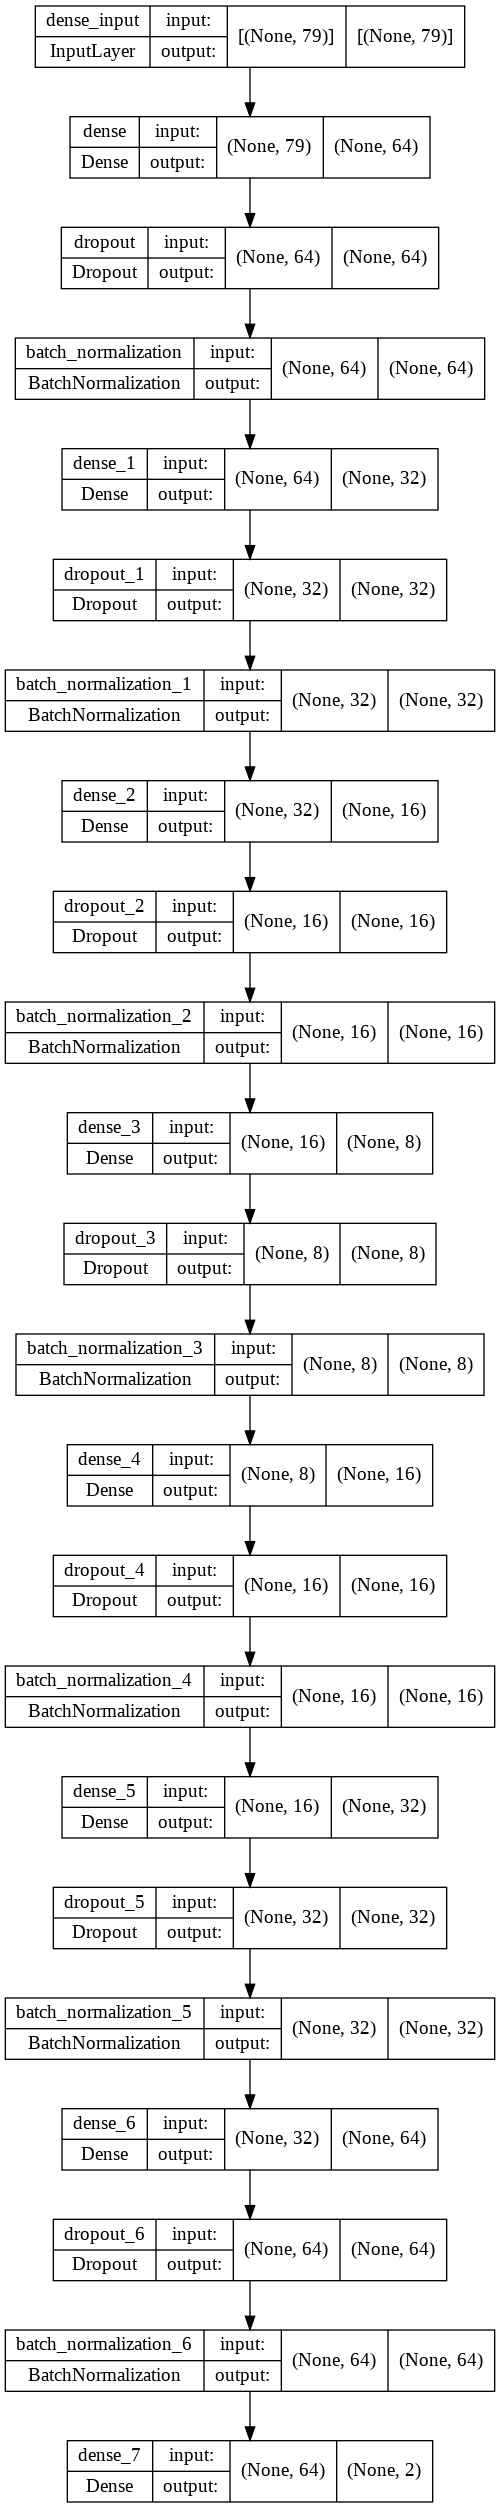

In [ ]:
plot_model(model,to_file='model.png', show_shapes=True)

###Doing prediction using the trained model

In [ ]:
t = model.predict(x_valid[0].reshape(1,79))
t

array([[4.8392988e-04, 8.3635569e-01, 1.5424946e-01, 1.4766293e-03,
        9.1998198e-04, 2.9459279e-03, 3.4451718e-03, 1.2314413e-04]],
      dtype=float32)

In [ ]:
y_valid[0]

array([0, 1, 0, 0, 0, 0, 0, 0])

###Plots

In [ ]:
an_val_acc = [0.792,0.7694,0.7593,0.7653,0.7504,0.7302,0.8119,0.7062,0.8018,0.8143]
an_acc = [0.7962,0.8129,0.8152,0.8165,0.8192,0.8192,0.8201,0.8203,0.8211,0.8212]
an_loss = [0.397,0.3424,0.3335,0.3283,0.3233,0.3222,0.3195,0.3184,0.3161,0.3156]

x_axis = [1,2,3,4,5,6,7,8,9,10]

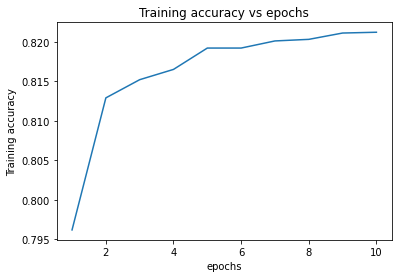

In [ ]:
plt.plot(x_axis, an_acc)
plt.xlabel('epochs')
plt.ylabel('Training accuracy')
plt.title('Training accuracy vs epochs')
plt.show()

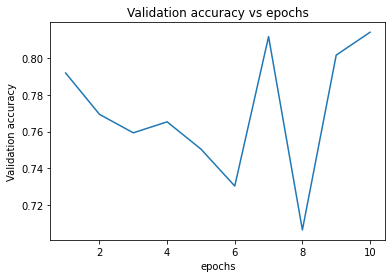

In [ ]:
plt.plot(x_axis, an_val_acc)
plt.xlabel('epochs')
plt.ylabel('Validation accuracy')
plt.title('Validation accuracy vs epochs')
plt.show()

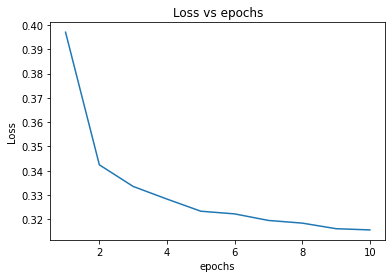

In [ ]:
plt.plot(x_axis, an_loss)
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.title('Loss vs epochs')
plt.show()

*************************************

###Model 2: Variational Autoencoder


In [133]:
from tensorflow import keras
from tensorflow.keras import layers

In [175]:
class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon


latent_dim = 2

encoder_inputs = keras.Input(shape=(77,))
x = layers.Dense(64,activation="relu",)(encoder_inputs)
x = layers.Dense(32, activation="relu")(x)
x = layers.Dense(16, activation="relu")(x)
x = layers.Dense(8, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")

latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(8, activation="relu")(latent_inputs)
x = layers.Dense(16,activation="relu")(x)
x = layers.Dense(32,activation="relu")(x)
x = layers.Dense(64,activation="relu")(x)
decoder_outputs = layers.Dense(77,activation="relu")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")

final_inputs = keras.Input(shape=(77,))
x = layers.Dense(64,activation="relu")(final_inputs)
x = layers.Dense(32,activation="relu")(x)
x = layers.Dense(16,activation="relu")(x)
outputs = layers.Dense(NUM_OF_CLASSES,activation="softmax")(x)
clf = keras.Model(final_inputs, outputs, name="classifier")

class VAE(keras.Model):
    def __init__(self, encoder, decoder, classifier, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.classifier = classifier
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.acc_tracker = keras.metrics.CategoricalAccuracy(name="acc")
        self.reconstruction_loss_tracker = keras.metrics.CategoricalAccuracy(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")
        # self.classifier_loss_tracker = keras.metrics.categorical_crossentropy(name="classifier_loss")
    
    def call(self,data):
      z_mean, z_log_var, z = self.encoder(data)
      reconstruction = self.decoder(z)
      output = self.classifier(reconstruction)
      return output
    
    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.acc_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data[0])
            reconstruction = self.decoder(z)
            output = self.classifier(reconstruction)
            # reconstruction_loss = tf.reduce_mean(
            #     tf.reduce_sum(
            #         keras.losses.categorical_crossentropy(data[0], reconstruction), axis=1
            #     )
            # )
            reconstruction_loss =  keras.losses.categorical_crossentropy(data[0], reconstruction)
            classifier_loss = keras.losses.categorical_crossentropy(data[1],output)
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss + classifier_loss
            # total_loss =  kl_loss + classifier_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(data[0],reconstruction)
        self.kl_loss_tracker.update_state(kl_loss)
        self.acc_tracker.update_state(data[1],output)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
            "accuracy": self.acc_tracker.result()
        }

    def test_step(self,data):
      z_mean, z_log_var, z = self.encoder(data[0])
      reconstruction = self.decoder(z)
      output = self.classifier(reconstruction)
      classifier_loss = keras.losses.categorical_crossentropy(data[1],output)
      # reconstruction_loss = tf.reduce_mean(
      #           tf.reduce_sum(
      #               keras.losses.categorical_crossentropy(data[0], reconstruction), axis=1
      #           )
      #       )
      reconstruction_loss =  keras.losses.categorical_crossentropy(data[0], reconstruction)
      kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
      kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
      total_loss = reconstruction_loss + kl_loss + classifier_loss
      # total_loss =  kl_loss + classifier_loss
      self.total_loss_tracker.update_state(total_loss)
      self.reconstruction_loss_tracker.update_state(data[0],output)
      self.kl_loss_tracker.update_state(kl_loss)
      self.acc_tracker.update_state(data[1],output)
      return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
            "acc": self.acc_tracker.result()
        }

In [176]:
vae = VAE(encoder, decoder,clf)
vae.compile(
    optimizer=keras.optimizers.Adam(lr=0.002))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [177]:
vae.fit( 
      x_train,y_train,
      batch_size=BATCH_SIZE,
      epochs=EPOCHS,
      validation_data=(x_valid,y_valid)
    )

Epoch 1/10
8396/8396 [==============================] - 44s 5ms/step - loss: 35.8663 - reconstruction_loss: 0.9987 - kl_loss: 0.7019 - accuracy: 0.2680 - val_loss: 34.1669 - val_reconstruction_loss: 0.0453 - val_kl_loss: 1.1860 - val_acc: 0.5435
Epoch 2/10
8396/8396 [==============================] - 41s 5ms/step - loss: 33.5670 - reconstruction_loss: 0.9991 - kl_loss: 1.2599 - accuracy: 0.6148 - val_loss: 33.9567 - val_reconstruction_loss: 0.0592 - val_kl_loss: 1.3307 - val_acc: 0.6508
Epoch 3/10
8396/8396 [==============================] - 45s 5ms/step - loss: 33.6223 - reconstruction_loss: 0.9991 - kl_loss: 1.2889 - accuracy: 0.6316 - val_loss: 33.9392 - val_reconstruction_loss: 0.0506 - val_kl_loss: 1.3322 - val_acc: 0.6439
Epoch 4/10
8396/8396 [==============================] - 44s 5ms/step - loss: 33.5219 - reconstruction_loss: 0.9991 - kl_loss: 1.3353 - accuracy: 0.6482 - val_loss: 34.0268 - val_reconstruction_loss: 0.0525 - val_kl_loss: 1.3147 - val_acc: 0.6215
Epoch 5/10
8396/

In [ ]:
vae.save('vae')

INFO:tensorflow:Assets written to: vae/assets


In [ ]:
!zip -r /content/vae.zip /content/vae

  adding: content/vae/ (stored 0%)
  adding: content/vae/saved_model.pb (deflated 89%)
  adding: content/vae/keras_metadata.pb (deflated 93%)
  adding: content/vae/variables/ (stored 0%)
  adding: content/vae/variables/variables.index (deflated 73%)
  adding: content/vae/variables/variables.data-00000-of-00001 (deflated 50%)
  adding: content/vae/assets/ (stored 0%)


In [ ]:
t = vae.predict(x_valid)

In [ ]:
t = vae.predict(test_df.to_numpy().reshape(1,77))
t

array([[0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
true_labels = tf.argmax(y_valid, axis = 1)
preds = tf.argmax(t, axis = 1)

In [ ]:
cm = confusion_matrix(true_labels,preds)

In [ ]:
cmd = ConfusionMatrixDisplay(cm, display_labels=list(np.unique(train_df.iloc[:,-1])))

[Text(0, 0.5, 'True'), Text(0.5, 0, 'Predicted')]

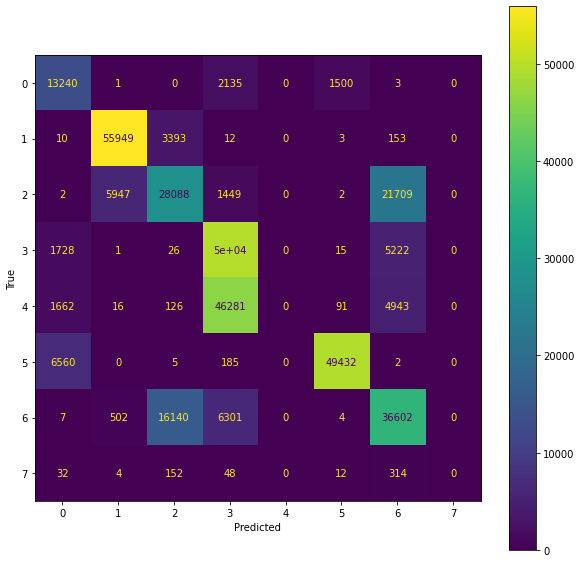

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
cmd.plot(ax=ax)
cmd.ax_.set(xlabel='Predicted', ylabel='True')

###Plots

In [ ]:
vae_val_acc = [0.573,0.611,0.5906,0.5865,0.6387,0.6268,0.6231,0.6293,0.6366,0.6306]
vae_acc = [0.3385,0.6008,0.6235,0.6205,0.6226,0.6215,0.6142,0.6265,0.6301,0.6313]
vae_loss = [41.06,37.31,37.297,36.96,37.002,36.9986,36.9986,36.9319,36.9478,35.69]

x_axis = [1,2,3,4,5,6,7,8,9,10]

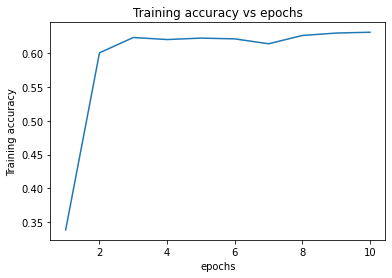

In [ ]:
plt.plot(x_axis, vae_acc)
plt.xlabel('epochs')
plt.ylabel('Training accuracy')
plt.title('Training accuracy vs epochs')
plt.show()

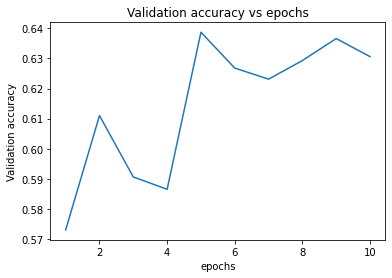

In [ ]:
plt.plot(x_axis, vae_val_acc)
plt.xlabel('epochs')
plt.ylabel('Validation accuracy')
plt.title('Validation accuracy vs epochs')
plt.show()

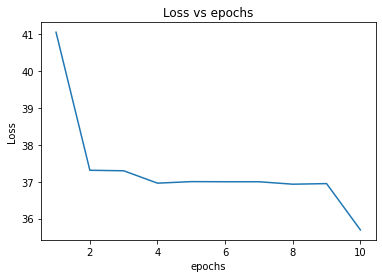

In [ ]:
plt.plot(x_axis, vae_loss)
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.title('Loss vs epochs')
plt.show()

***************************************************

###ML models



###Gradient Boosting

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
clf = GradientBoostingClassifier(n_estimators=10, learning_rate=0.8,max_depth=3, random_state=0).fit(x_train, y_train)

In [ ]:
clf.score(x_valid, y_valid)

0.8379347336709114

In [13]:
import pickle

In [ ]:
with open('gb.pkl', 'wb') as f:
    pickle.dump(clf, f)

###XGBoost

In [29]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [ ]:
xgb_cl = xgb.XGBClassifier(learning_rate=0.8,max_depth=3)

In [ ]:
xgb_cl.fit(x_train, y_train)

XGBClassifier(learning_rate=0.8, objective='multi:softprob')

In [ ]:
preds = xgb_cl.predict(x_valid)

In [ ]:
accuracy_score(y_valid, preds)

0.8702899799343001

In [ ]:
with open('xgb.pkl', 'wb') as f:
    pickle.dump(xgb_cl, f)

###CatBoost


In [ ]:
!pip install catboost

In [23]:
from catboost import CatBoostClassifier

In [82]:
clf = CatBoostClassifier(
    learning_rate=0.3,
    iterations=20  
    #loss_function='CrossEntropy'
)

In [83]:
clf.fit(
    x_train, y_train,
    eval_set=(x_valid, y_valid),
)

0:	learn: 0.8241846	test: 0.8236988	best: 0.8236988 (0)	total: 1.18s	remaining: 22.3s
1:	learn: 0.6337811	test: 0.6334891	best: 0.6334891 (1)	total: 2.31s	remaining: 20.8s
2:	learn: 0.5198800	test: 0.5197673	best: 0.5197673 (2)	total: 3.36s	remaining: 19s
3:	learn: 0.4481616	test: 0.4481350	best: 0.4481350 (3)	total: 4.37s	remaining: 17.5s
4:	learn: 0.3989978	test: 0.3990416	best: 0.3990416 (4)	total: 5.34s	remaining: 16s
5:	learn: 0.3642539	test: 0.3643662	best: 0.3643662 (5)	total: 6.28s	remaining: 14.7s
6:	learn: 0.3358616	test: 0.3360690	best: 0.3360690 (6)	total: 7.32s	remaining: 13.6s
7:	learn: 0.3165608	test: 0.3168417	best: 0.3168417 (7)	total: 8.34s	remaining: 12.5s
8:	learn: 0.3015860	test: 0.3019805	best: 0.3019805 (8)	total: 9.31s	remaining: 11.4s
9:	learn: 0.2901028	test: 0.2905511	best: 0.2905511 (9)	total: 10.4s	remaining: 10.4s
10:	learn: 0.2815308	test: 0.2821310	best: 0.2821310 (10)	total: 11.5s	remaining: 9.39s
11:	learn: 0.2746735	test: 0.2752816	best: 0.2752816 (11

In [ ]:
clf.save_model('cat_boost',format='cbm')

In [ ]:
t = CatBoostClassifier()
t.load_model('cat_boost')

In [84]:
preds = clf.predict(x_valid)
accuracy_score(y_valid, preds)

0.8646245004363365

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt


def plot_feature_importance(importance,names,model_type):
    
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_names'], y=fi_df['feature_importance'])
    #Add chart labels
    plt.title(model_type + 'Feature Importance')
    plt.xlabel('FEATURE NAMES')
    plt.ylabel('FEATURE IMPORTANCE')
    return fi_df

In [37]:
features = [i for i in range(77)]

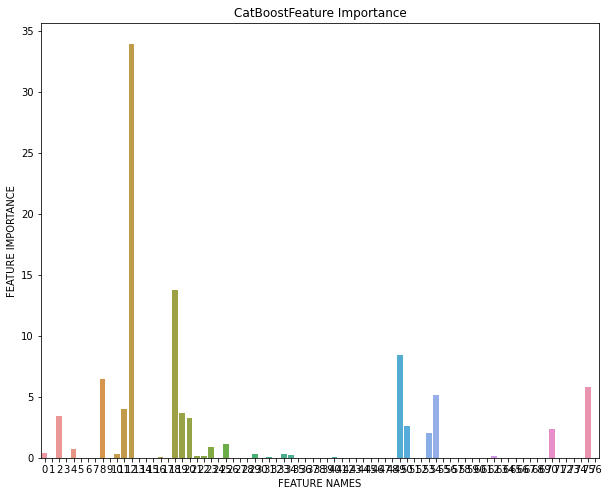

In [38]:
fi_df = plot_feature_importance(clf.feature_importances_, features, "CatBoost")

In [47]:
fi_df=fi_df[fi_df['feature_importance'] > 0.5]
fi_df.sort_values(by=['feature_names'], ascending=True,inplace=True)
fi_df

,feature_names,feature_importance
2,2,3.434848
4,4,0.717143
8,8,6.501051
11,11,4.020345
12,12,33.954605
18,18,13.719624
19,19,3.643999
20,20,3.302874
23,23,0.925293
25,25,1.157873


In [104]:
train_df = train_df.iloc[:,list(fi_df['feature_names'].to_numpy())+[77]]

In [105]:
train_df.columns

Index(['Flow Bytes/s', 'Fwd Packets/s', 'Total Length of Fwd Packets',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Max Packet Length', ' Min Packet Length', ' Packet Length Mean',
       ' Fwd Header Length', ' min_seg_size_forward', ' ACK Flag Count',
       ' URG Flag Count', ' Average Packet Size', 'Init_Win_bytes_forward',
       ' Avg Fwd Segment Size', ' Subflow Fwd Bytes', ' Label'],
      dtype='object')

In [106]:
valid_df = valid_df.iloc[:,list(fi_df['feature_names'].to_numpy())+[77]]

In [107]:
valid_df.columns

Index(['Flow Bytes/s', 'Fwd Packets/s', 'Total Length of Fwd Packets',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Max Packet Length', ' Min Packet Length', ' Packet Length Mean',
       ' Fwd Header Length', ' min_seg_size_forward', ' ACK Flag Count',
       ' URG Flag Count', ' Average Packet Size', 'Init_Win_bytes_forward',
       ' Avg Fwd Segment Size', ' Subflow Fwd Bytes', ' Label'],
      dtype='object')

In [ ]:
!ls

cat_boost  catboost_info  drive  sample_data


In [ ]:
preds = clf.predict(scaler.transform(test_df.to_numpy()))
# accuracy_score(y_valid, preds)
preds

array([[0]])

In [ ]:
preds = clf.predict(x_valid)
accuracy_score(y_valid, preds)

0.8657951997065468

In [ ]:
cm = confusion_matrix(y_valid,preds)

array([[16874,     0,     2,     5,    20,     0,     0,     0],
       [   12, 58968,   553,     1,     4,     0,     0,     0],
       [    6,  1261, 55345,     0,     9,     0,   467,     0],
       [    4,     0,    16, 21074, 35650,     0,   107,     0],
       [   59,     0,   176,  7734, 45120,     6,    74,     0],
       [   16,     0,     4,     0,     0, 56145,     1,     0],
       [    3,     0,  1584,     0,     3,     1, 57985,     2],
       [   34,     0,    38,     0,    19,     2,   421,    48]])

In [ ]:
cmd = ConfusionMatrixDisplay(cm, display_labels=list(np.unique(train_df.iloc[:,-1])))

[Text(0, 0.5, 'True'), Text(0.5, 0, 'Predicted')]

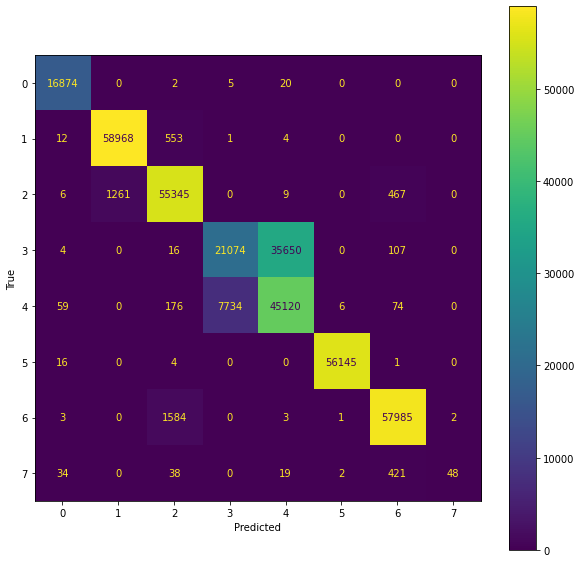

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
cmd.plot(ax=ax)
cmd.ax_.set(xlabel='Predicted', ylabel='True')

In [ ]:
x = clf.predict(x_valid[:10])
x

array([[1],
       [3],
       [5],
       [6],
       [1],
       [2],
       [3],
       [6],
       [6],
       [2]])

In [ ]:
y_valid[:10]

array([1, 3, 5, 6, 1, 2, 4, 6, 6, 2])

###LGBM classifier

In [85]:
import lightgbm as lgb

In [86]:
clf = lgb.LGBMClassifier()

In [87]:
clf.fit(x_train, y_train)

LGBMClassifier()

In [88]:
preds=clf.predict(x_valid)
accuracy_score(y_valid, preds)

0.8606474456246839

In [ ]:
cm = confusion_matrix(y_valid,preds)

In [ ]:
cmd = ConfusionMatrixDisplay(cm, display_labels=list(np.unique(train_df.iloc[:,-1])))

[Text(0, 0.5, 'True'), Text(0.5, 0, 'Predicted')]

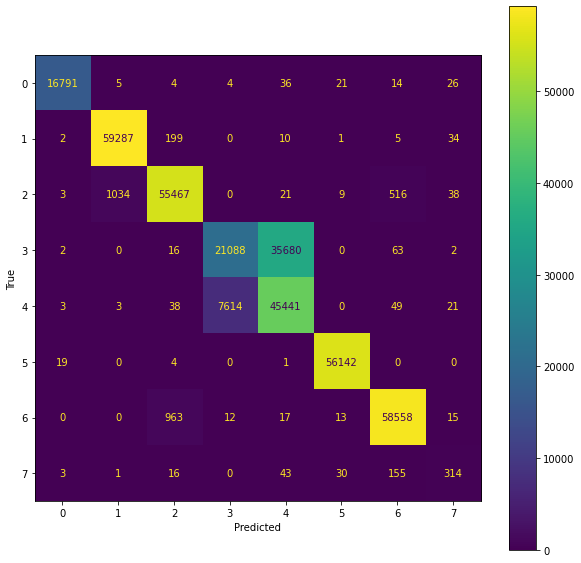

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
cmd.plot(ax=ax)
cmd.ax_.set(xlabel='Predicted', ylabel='True')